In [1]:
import sys
sys.path.append("../py")
import transitTools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
SignalPlusNoiseCurve = loadtxt('../data/signalPlusNoiseCurve_00_0.txt')

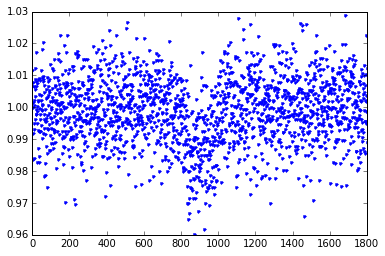

In [5]:
plot (SignalPlusNoiseCurve,'.')

In [18]:
# Measuring the noise out of transit

length=len(SignalPlusNoiseCurve)
SignalPlusNoiseCurve_pre=SignalPlusNoiseCurve[0:600]
SignalPlusNoiseCurve_post=SignalPlusNoiseCurve[1200:length]
noiseRange = concatenate((SignalPlusNoiseCurve_pre,SignalPlusNoiseCurve_post))

measured_noise=std(noiseRange)
print stdnoise

0.00979419258817


In [21]:
time=arange(1800)
model_signal = ones(1800)
model_signal[(time <1000) & (time > 800)]=min(signalcurve)



def tophat_model(t0=900,depth=0.01,dur=2*60.): # top hat model function
    modelSignal = ones(1800)
    modelSignal[(time >t0-(dur/2.)) & (time < t0+(dur/2.))]=1-depth
    return modelSignal

In [46]:
depth1 = max(signalcurve)-min(signalcurve) # basic way of getting the depth
depth2 = mean(signalcurve[825:975])
depth2_length = len(signalcurve[825:975])
print depth1,depth2

0.0686798941578 0.987585458232


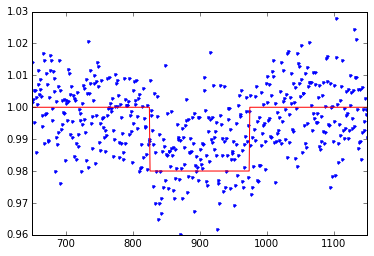

In [52]:
modelSignal = tophat_model(t0=900,depth=0.02,dur=150)

plot(SignalPlusNoiseCurve,'.')
xlim([650,1150])
plot (modelSignal,'r')

In [51]:
# Basic way of getting the signal to noise

signal_to_noise = ((1-depth2)/stdnoise)*depth2_length**0.5 
print signal_to_noise 

15.5241447664


In [29]:
# Model lightcurve - needs finishing

def chi_squared(noise,SignalPlusNoiseCurve,modelSignal):
    chi_squared_value = sum(((SignalPlusNoiseCurve-modelSignal)/noise)**2)
    return chi_squared_value


chi_squared_value = chi_squared(stdnoise,SignalPlusNoiseCurve,modelSignal)  
print chi_squared_value
    
    
    

2000.86544579
